In [3]:
import numpy as np
import segyio
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack
from scipy import signal
import RSSPython as rs
from ukpgks import signal as usignal

In [4]:
rss = rs.RSSdata()
rss.read('wav6Hz.rss')
wav_0 = rss.data.squeeze()
rss.read('wav6Hz_up.rss')
wav_up = rss.data.squeeze()
rss.read('7Hz/wav7Hz.rss')
wav_7 = rss.data.squeeze()

wav_0 = usignal.normalize(wav_0)
wav_up = usignal.normalize(wav_up)
wav_7 = usignal.normalize(wav_7)

(40002,) (40002,)


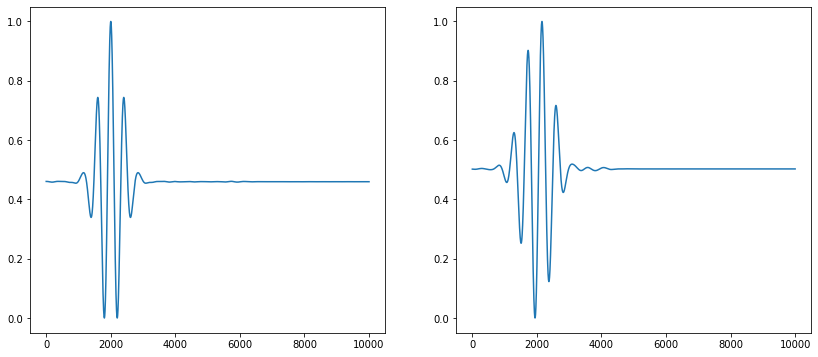

In [5]:
fig,ax = plt.subplots(1,2,figsize=(14,6))

ax[0].plot(wav_0[:10000])
ax[1].plot(wav_up[:10000])

print(wav_0.shape,wav_up.shape)

In [6]:
def ricker(center_freq,dt,tmax,t0=None,plot=False):
    """
    tmax            time lenght
    nt              number of samples
    dt              sampling interval
    center_freq     dominant freq.
    t0              time for center sample (peak) in sec.
                    default is center output trace: t_0 = (nt-1)/2 * dt
    Output:
    w               wavelet
    t               time
    """
    nt = tmax/dt - 1

    if t0 is None:
        t0 = (nt-1)/2 * dt

    t = np.arange(0,tmax+dt,dt)
    t = t - t0
    arg = (np.pi*center_freq*t)**2
    w = (1-2*arg)*np.exp(-arg)
    t = t + t0
    if plot==True:
        plt.plot(t,w)
        plt.xlabel('Time (sec.)')
        plt.ylabel('Amplitude')
        plt.grid()
    return w,t

(4002,)

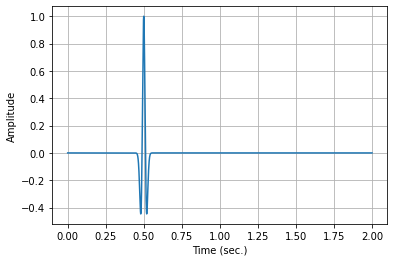

In [7]:
w,t = ricker(20,0.0005,2,0.5,True)
w.shape

In [8]:
def phase_shift(data,shift):
    """
    inputs
    data:  1D array
    shift: in degrees
    outputs:
    data_shifted
    """
    from scipy import signal
    
    h = signal.hilbert(data)
    hr = np.real(np.fft.ifft(np.fft.fft(h*np.exp(-1j*(shift*np.pi/180)))))
    return hr

Text(0.5, 1.0, '180 degree rotated avelet')

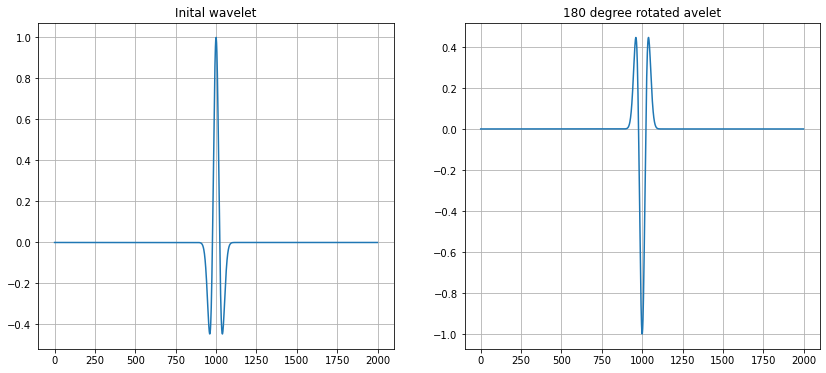

In [10]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
w90 = phase_shift(w,180)
ax[0].plot(w[:2000])
ax[1].plot(w90[:2000])
ax[0].grid();ax[1].grid()
ax[0].set_title('Inital wavelet');ax[1].set_title('180 degree rotated avelet')

(40002,) (40001,)


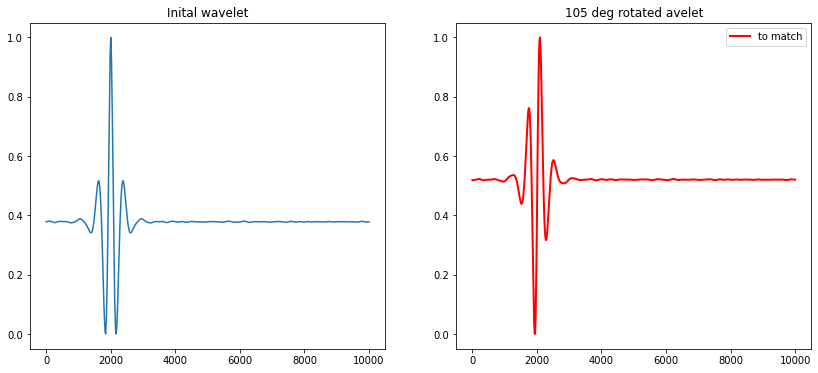

In [17]:
fig,ax = plt.subplots(1,2,figsize=(14,6))
w_rot = phase_shift(wav_0,105)
w_7 = phase_shift(wav_7,105)
w_rot = usignal.normalize(w_7)
ax[0].plot(wav_7[:10000])
#ax[1].plot(w_7[:10000],'b--',linewidth=4,label='rotated')
ax[1].plot(w_rot[:10000],'r',linewidth=2,label='to match')
ax[1].legend()
ax[0].set_title('Inital wavelet');ax[1].set_title('105 deg rotated avelet')
print(wav_0.shape,w_rot.shape)

In [22]:
rss = rs.RSSdata()
rss.read('7Hz/wav7Hz.rss')
rss.data  = w_rot.reshape(-1,1)
rss.write('7Hz/wav7Hz_rot.rss')